# Model Training


In [ ]:
# --- Model Training Setup ---

# Import necessary libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
try:
    df = pd.read_csv('../data/processed/model_ready_data.csv')
    print("Processed dataset loaded successfully!")
    print(f"Shape of the dataset: {df.shape}")
except FileNotFoundError:
    print("Error: model_ready_data.csv not found. Make sure you ran the feature engineering notebook.")

df.head()

Processed dataset loaded successfully!
Shape of the dataset: (95662, 25)


,CustomerId,Amount,Value,PricingStrategy,FraudResult,TransactionHour,DayOfWeek,DayOfMonth,ProductCategory_airtime,ProductCategory_data_bundles,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,MonetarySum,MonetaryMean
0,CustomerId_4406,1000.0,1000,2,0,2,3,15,1,0,...,0,0,0,0,1,0,1,119,203847,1713.000000
1,CustomerId_4406,-20.0,20,2,0,2,3,15,0,0,...,0,0,0,1,0,0,1,119,203847,1713.000000
2,CustomerId_4683,500.0,500,2,0,2,3,15,1,0,...,0,0,0,0,1,0,82,2,1000,500.000000
3,CustomerId_988,20000.0,21800,2,0,3,3,15,0,0,...,0,1,0,0,1,0,6,38,286623,7542.710526
4,CustomerId_988,-644.0,644,2,0,3,3,15,0,0,...,0,0,0,1,0,0,6,38,286623,7542.710526


In [2]:
# --- Define Features (X) and Target (y) ---

y = df['FraudResult']

X = df.drop(columns=['FraudResult', 'CustomerId'])

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


# --- Spliting Data into Training and Testing Sets ---

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nData Splitting Complete:")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Fraud cases in training set:", sum(y_train))
print("Fraud cases in testing set:", sum(y_test))

Features (X) shape: (95662, 23)
Target (y) shape: (95662,)

Data Splitting Complete:
Training set size: 76529
Testing set size: 19133
Fraud cases in training set: 154
Fraud cases in testing set: 39


Training the Logistic Regression model...


/home/fua/projects/credit-risk-model/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training complete.

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19094
           1       0.16      1.00      0.28        39

    accuracy                           0.99     19133
   macro avg       0.58      0.99      0.64     19133
weighted avg       1.00      0.99      0.99     19133

Confusion Matrix:


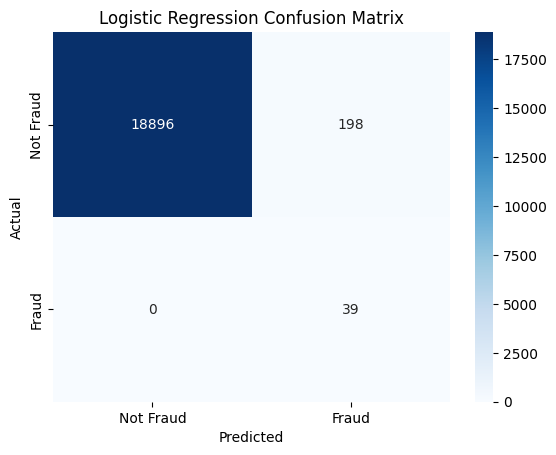

In [3]:
# --- Train a Baseline Model: Logistic Regression ---

lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train the model on the training data
print("Training the Logistic Regression model...")
lr_model.fit(X_train, y_train)
print("Training complete.")


# --- Evaluate the Baseline Model ---

y_pred_lr = lr_model.predict(X_test)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [4]:
# --- Step 1: Scale the Features ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Data scaling complete.")

Data scaling complete.


Calculated scale_pos_weight: 495.94

Training the LightGBM model...
[LightGBM] [Info] Number of positive: 154, number of negative: 76375
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 76529, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002012 -> initscore=-6.206458
[LightGBM] [Info] Start training from score -6.206458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/home/fua/projects/credit-risk-model/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     19094
           1       0.04      0.92      0.08        39

    accuracy                           0.96     19133
   macro avg       0.52      0.94      0.53     19133
weighted avg       1.00      0.96      0.98     19133

Confusion Matrix:


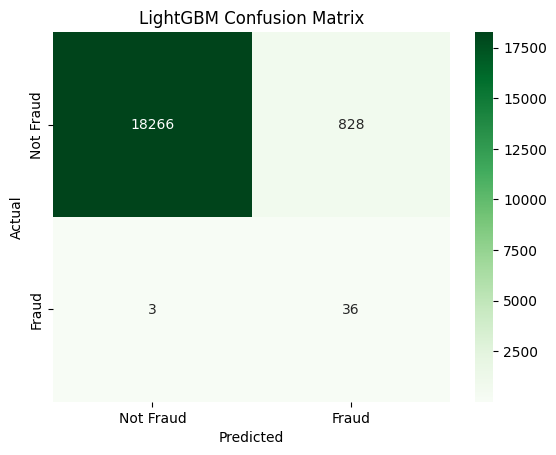

In [5]:
# ---  2: Train the LightGBM Model ---

count_neg = y_train.value_counts()[0]
count_pos = y_train.value_counts()[1]
scale_pos_weight_value = count_neg / count_pos
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")

lgbm = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    scale_pos_weight=scale_pos_weight_value,
    random_state=42
)

print("\nTraining the LightGBM model...")
lgbm.fit(X_train_scaled, y_train)
print("Training complete.")


# ---  3: Evaluate the LightGBM Model ---

y_pred_lgbm = lgbm.predict(X_test_scaled)

print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgbm))

print("Confusion Matrix:")
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM Confusion Matrix')
plt.show()